# Factorial data

It is often the case that we wish to compare continuous data when the independent variable is categorical. For example:

* How does height vary depending on gender?

* How does income vary between two countries?

* How does hospital stay vary depending on treatment A or B?

The different options (A or B) are often referred to as "levels". Data from different levels are sometimes kept in separate files, but when merged together, the data frame would look something like this:

| ID |  Level  |  Value  |
|----|---------|---------|
| 1  |  A      |   67.5  |
| 2  |  B      |   54.3  |
| 3  |  B      |   71.1  |




---

## Do men and women have different humour?

For an example of this type of data, which is extremely common in the social sciences, consider gender differences in humour.

How would you go about to measure humour? Asking people to perform a stand-up routine and rating their ability to deliver a punchline may be entertaining for the researcher, but not tell us about the role humour plays in our daily lives.

There are plenty of stereotypes when it comes to humour, for example that women are self-deprecating while dads have a thing for clever puns - but do they hold up scientifically?

For this purpose, a psychologist by the name of Rod Martin developed the Humor Styles Questionnaire (HSQ) in 2003 to measure how people employ humour. Martin then let around 1200 people (470 males, 725 females) answer the HSQ and collected their responses, which have been downloaded from [here](https://openpsychometrics.org/_rawdata/).

![alt text](victorian_people_laughing.jpg "Title")

The test measures four different styles, with 8 items for each: people with _affiliative_ humour use jokes and banter to be liked, those with _self-enhancing_ humour use it to cope psychologically; _self-defeating_ humour means using self-deprecation to be liked, and _aggressive_ humour is used to tease and ridicule. Respondents agree with each item on a scale of 1-5. Curious about your humour style? You can find a demo of the survey [here](https://www.psytoolkit.org/cgi-bin/psy2.4.1/survey?s=pgHAe
).

### Let's load the data!
To prepare our analysis into gender differences, let's load the data and run the cell below. The raw CSV has a row for each subject, a column for each question, and a mean value for each style, which we will replace by a total value. Gender is encoded with 1 for male, 2 for female, and 3 for other.

For example, subject 0 is a woman, with a total score of 32 in the affiliative questions. (NOTE TO SELF: why are some fractions????)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mlab

#Read in file
df = pd.read_csv('data.csv', usecols=['affiliative', 'selfenhancing', 'agressive', 'selfdefeating','gender'])


#Cells give mean response. To get a total, multiply each by 8
df['affiliative'] = df['affiliative'] * 8
df['selfenhancing'] = df['selfenhancing'] * 8
df['agressive'] = df['agressive'] * 8
df['selfdefeating'] = df['selfdefeating'] * 8


df.head()

,affiliative,selfenhancing,agressive,selfdefeating,gender
0,32.0,28.0,24.0,18.4,2
1,26.4,28.0,26.4,19.2,2
2,31.2,31.2,24.8,18.4,1
3,28.8,32.0,23.2,26.4,2
4,32.8,32.8,23.2,16.0,1


### Let's choose the question!

To keep it simple, let's focus on one style: aggressive humour. Do men employ that more than women?

The first thing to do when dealing with continuous independent data observations is to get a sense of their distribution. What shape is it? Where is it clustered?

For this we create a _histogram_ where we plot each possible response value against its frequency (using **density = False**). Notice that, because our data is continuous, we will have to split into bins. The **bins='auto'** option does this automatically for us.

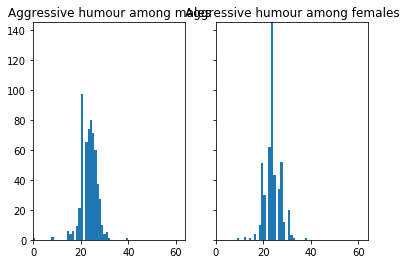

In [78]:
## histogram

fig, axs = plt.subplots(1, 2, sharey=True)

female = df['gender'] == 2
male = df['gender'] == 1

male_agg = df[male]['agressive']
female_agg = df[female]['agressive']

axs[0].hist(male_agg, bins='auto', density=False)
axs[0].set_title("Aggressive humour among males")
axs[0].set_ylim(0,145)
axs[0].set_xlim(0,64)

axs[1].hist(female_agg, bins='auto', density=False)
axs[1].set_title("Aggressive humour among females")
axs[1].set_ylim(0,145)
axs[1].set_xlim(0,64)

plt.show()                                        ####NOTE TO SELF: ALIGN Y-AXES


##  Is it bell-shaped?


When exploring its shape, there is one issue were are particularly interested in: is it _normally distributed_ or not? 

According to a fundamental law in statistics, known as the _Central Limit Theorem_, when an outcome is the sum of many independent causes, that outcome becomes normally distributed. That is why, in Nature, normal distributions (or "bell curves") are pervasive, but by no means universal.

The bell curve has many elegant properties. **Its mean, mode and median are all the same**, and because all values cluster tightly around it, they all summarise the distribution very well.

Because many different causes are likely to influence humour style, we have reason to believe it is normally distributed, however the bell shape normally appears only in large samples. 

**If our sample is _not_ normal (it is _skewed_), the mean would no longer be representative of a "typical" value, and we are better off with the median instead.**

Many data scientists decide whether it is normal using only their eyes, although there are fancy tests available to decide for us. Here, we use our eyes. Does it look bell-shaped to you?

(The code below generates a bell shaped curve where y-axis gives the probability density. Don't worry too much about it for now).


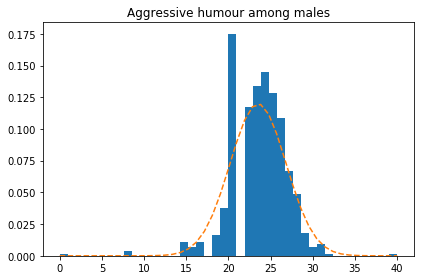

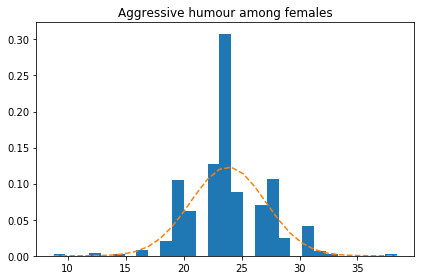

In [79]:
## bell overlap
import scipy.stats

fig, ax = plt.subplots()


n, bins, patches = ax.hist(male_agg, bins='auto', density=True)
ax.set_title("Aggressive humour among males")


###don't worry about this now
mu = np.mean(male_agg)
sigma = np.std(male_agg)

y = scipy.stats.norm.pdf(bins, mu, sigma)
ax.plot(bins, y, '--')

fig.tight_layout() 
plt.show()   
###############################################################
fig, ax = plt.subplots()


n, bins, patches = ax.hist(female_agg, bins='auto', density=True)
ax.set_title("Aggressive humour among females")

###don't worry about this now
mu = np.mean(female_agg)
sigma = np.std(female_agg)

y = scipy.stats.norm.pdf(bins, mu, sigma)
ax.plot(bins, y, '--')

fig.tight_layout() 
plt.show()                                        ###NOTE TO SELF: ALIGN X-AXES


## Central tendency

If you agree that it looks bell-shaped, then let's calculate the mean and median. It is common to report both. 



In [86]:
## Central tendency
female_agg_mean = np.mean(female_agg)
male_agg_mean = np.mean(male_agg)

female_agg_median = np.median(female_agg)
male_agg_median = np.median(male_agg)

print("Male mean: " + str(male_agg_mean))
print("Female mean: " + str(female_agg_mean)) 

print("Male median: " + str(male_agg_median) )
print("Female median: " + str(female_agg_median ))


Male mean: 23.50567986230631
Female mean: 23.845702306079637
Male median: 24.0
Female median: 23.2


## Spread

Unless we additionally report the spread of the distribution - how much variation it contains - we don't know how useful the median is. If it is very widely spread, the mean is of only limited use. To accompany the mean, we calculate **standard deviation**.

Similarly, to accompany the median, the calculate the **interquartile range**.

In [87]:
## spread

female_agg_std = np.std(female_agg)
male_agg_std = np.std(male_agg)

female_agg_iqr = scipy.stats.iqr(female_agg)
male_agg_iqr = scipy.stats.iqr(female_agg)

print("Male standard deviation: " + str(male_agg_std))
print("Female standard deviation: " + str(female_agg_std)) 

print("Male IQ: " + str(male_agg_std) )
print("Female IQR: " + str(female_agg_std ))

Male standard deviation: 3.328102646075253
Female standard deviation: 3.238397670966247
Male IQ: 3.328102646075253
Female IQR: 3.238397670966247


## Summarising a distribution

A histogram, however, is not succinct enough when we wish to compare the key features - namely, central tendency and spread - between two distributions. For this, we require bar chart. This visually summarises the two means and standard deviations.

### Bar plots

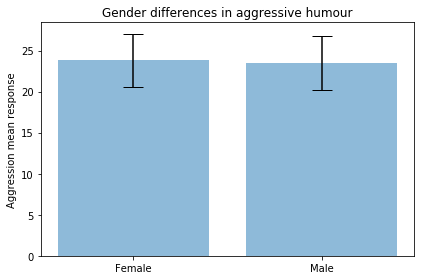

In [89]:
## bar plot

genders = ['Female', 'Male']
CTEs = [female_agg_mean, male_agg_mean]
error = [female_agg_std, male_agg_std]
x_pos = np.arange(len(genders))
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Aggression mean response')
ax.set_xticks(x_pos)
ax.set_xticklabels(genders)
ax.set_title('Gender differences in aggressive humour')
ax.yaxis.grid(False)

# Save the figure and show
plt.tight_layout()
plt.show()

### Box-and-whisker plot
Correspondingly, we wish to summarise the medians and interquartile ranges, using a box-and-whisker plot. This allows us to more clearly spot outliers. 

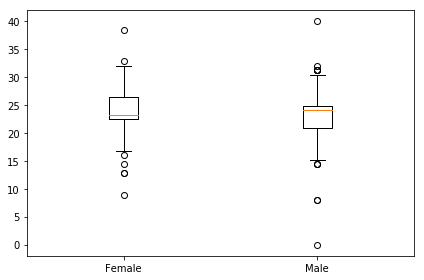

In [96]:
## box-and-whisker plot
fig, ax = plt.subplots()

ax.boxplot([female_agg, male_agg])
ax.set_xticks(x_pos + 1)
ax.set_xticklabels(genders)
ax.set_title('Gender differences in aggressive humour')

plt.tight_layout()
plt.show()

--- 
---

# Now it is up to you!

The culmination of this analysis is usually to perform a statistical significance test, in this case a t-test, to see how frequently this happens as a result of chance. But let us now decide based on our descriptive data: do men have a more aggressive humour? 

What is the case for self-defeating humour? 

If you want to read the original analysis, you can find it [here](https://www.sciencedirect.com/science/article/pii/S0092656602005342).